# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,classification_report


# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.24.3
- pandas 1.5.3
- Matplotlib 3.7.3
- scikit-learn 1.3.0



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Examine a general summary of statistics

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
df.dtypes


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

# Identify outliers

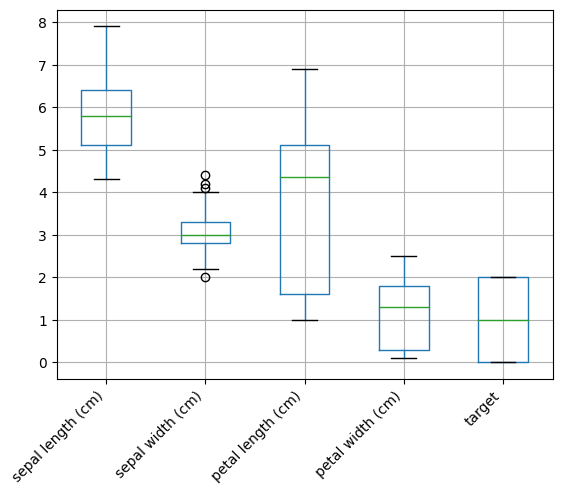

In [6]:
df.boxplot()
plt.xticks(rotation=45, ha="right")
plt.show()

In [7]:
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
print(lower_limit,upper_limit)
df = df[df['sepal width (cm)'].between(lower_limit, upper_limit)]

2.05 4.05


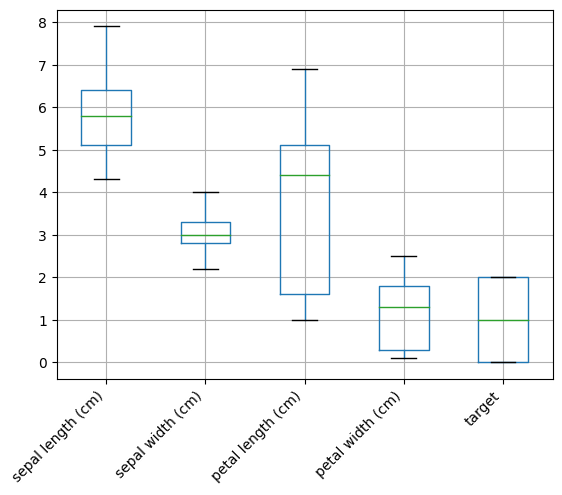

In [8]:
df.boxplot()
plt.xticks(rotation=45, ha="right")
plt.show()

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [9]:
df_filtered = df[df['target'].isin([0, 1])]
df_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [10]:
df_filtered['target'].value_counts()

1    49
0    47
Name: target, dtype: int64

# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

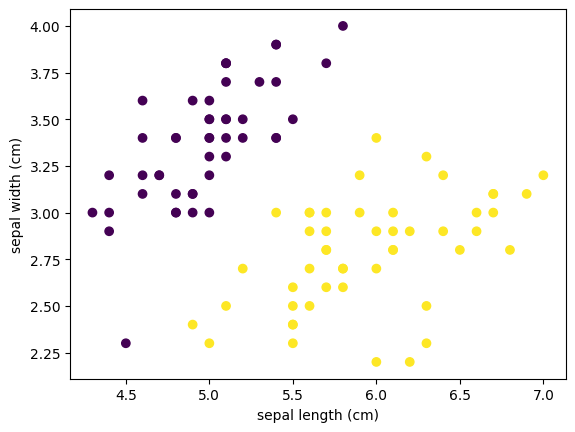

In [11]:
plt.scatter(df_filtered['sepal length (cm)'], df_filtered['sepal width (cm)'],c=df_filtered['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


# Plot a decision boundary for a given model

In [50]:
# means write a function

# Train a basic logistic regression model and plot its decision boundary

In [12]:
X = df_filtered.drop(['target'] , axis=1)
y = df_filtered['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x train : ",X_train.shape)
print("x test : ",X_test.shape)

x train :  (76, 4)
x test :  (20, 4)


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)
y_predict

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

In [14]:
model =svm.SVC(C= 100, kernel='linear')
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

In [15]:
model =svm.SVC(C= 0.1, kernel='linear')
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred


array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Split the datasets

In [16]:
X = df_filtered.drop(['target'] , axis=1)
y = df_filtered['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate an SVM model using a holdout test set

In [17]:
print(f'The accuracy of the model : {accuracy_score(y_test, pred)}')

The accuracy of the model : 1.0


In [27]:
import pickle
pickle_out = open("model.pkl",'wb')
pickle.dump(model,pickle_out)
pickle_out.close()


In [25]:
# print(f'The precision of the model : {precision_score(y_test, pred)}')

In [22]:
# print(f'The recall of the model : {recall_score(y_test, pred)}')

In [23]:
# print(f'The f1 score of the model : {f1_score(y_test, pred)}')

In [24]:
# print(f'The confusion matrix :-\n{classification_report(y_test, pred)}')